TASK-3: IRIS FLOWER CLASSIFICATION
* Author: Yasmine
* Batch:july-august
* Domain: Data science
* Aim: To built a machine learning model to predict the category of iris flower based on dataset





IMPORT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

IMPORT DATASET

In [2]:
df= pd.read_csv("/content/IRIS.csv")
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [3]:
df.shape

(150, 5)

DATA PER-PROCESSING

In [4]:
df.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


IMPORT LIBRARIES FOR ENCODING

In [7]:
from sklearn.preprocessing import LabelEncoder
from pandas.core.dtypes.common import is_numeric_dtype
le = LabelEncoder()

In [8]:
for i in df.columns:
  if is_numeric_dtype(df[i]):
    continue
  else:
    df[i] = le.fit_transform(df[i])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


DATA VISUALIZATION

<ipython-input-10-7d75638f4e17>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='species', data=df,palette="Set2")


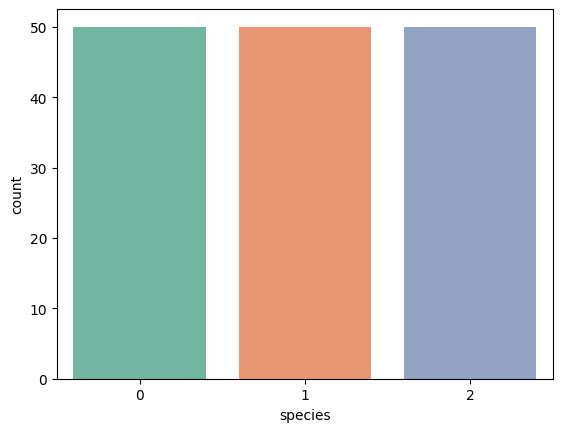

In [10]:
sns.countplot(x='species', data=df,palette="Set2")
plt.show()

<Axes: xlabel='sepal_length', ylabel='Count'>

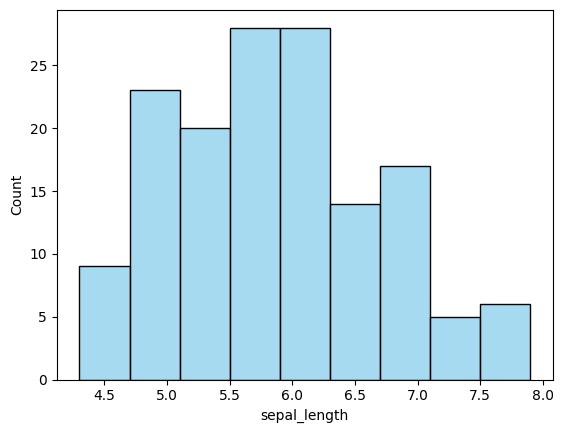

In [11]:
sns.histplot(data=df, x=df.sepal_length,color='skyblue' )

<Axes: xlabel='sepal_width', ylabel='Count'>

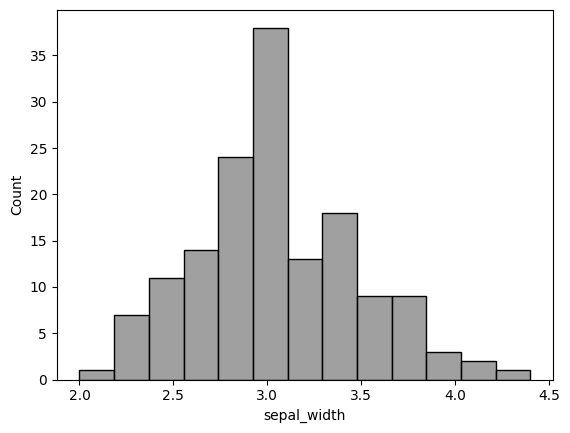

In [12]:
sns.histplot(data=df, x=df.sepal_width,color='grey')

<Axes: xlabel='petal_length', ylabel='Count'>

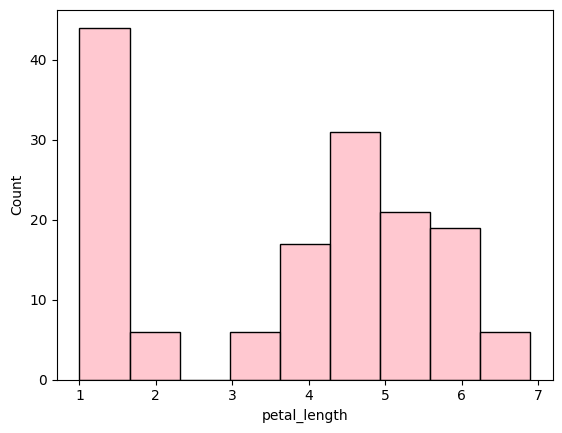

In [13]:
sns.histplot(data=df, x=df.petal_length,color='lightpink')

<Axes: xlabel='petal_width', ylabel='Count'>

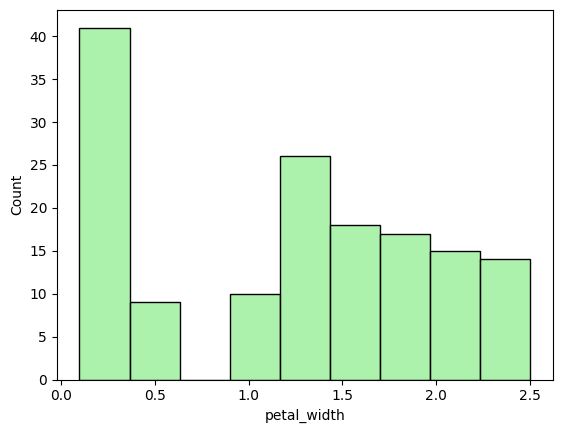

In [14]:
sns.histplot(data=df, x=df.petal_width,color='lightgreen')

<Axes: >

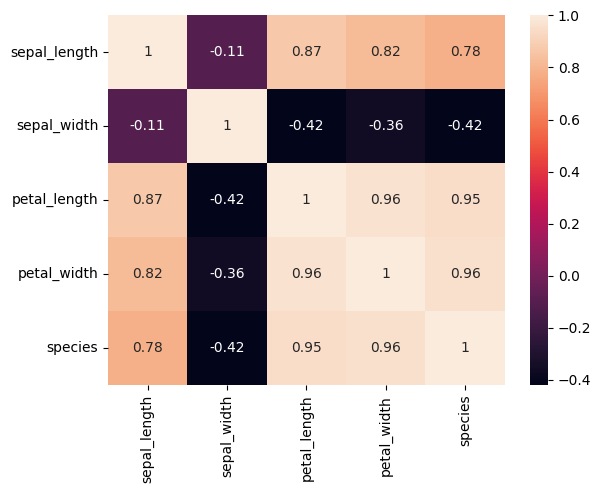

In [15]:
corr=df.corr()
sns.heatmap(corr,annot=True)

MODEL BUILDING


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [17]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [18]:
x=df.drop(['species'],axis=1)
y=df['species']

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [20]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [21]:
print("score for train data",model.score(x_train,y_train))
print("score for test data",model.score(x_test,y_test))

score for train data 0.975
score for test data 1.0


In [22]:
from sklearn.ensemble import RandomForestClassifier

model2=RandomForestClassifier(n_estimators=300,random_state=100)
model2.fit(x_train,y_train)

RandomForestClassifier(n_estimators=300, random_state=100)

In [23]:
print("score for train data",model2.score(x_train,y_train))
print("score for test data",model2.score(x_test,y_test))

score for train data 1.0
score for test data 1.0


In [24]:
from sklearn.neighbors import KNeighborsClassifier

model3=KNeighborsClassifier(n_neighbors=5)
model3.fit(x_train,y_train)

KNeighborsClassifier()

In [25]:
print("score for train data",model3.score(x_train,y_train))
print("score for test data",model3.score(x_test,y_test))

score for train data 0.9666666666666667
score for test data 1.0


MODEL TESTING

In [26]:
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [27]:
data={'sepal_length':5.1,'sepal_width':3.5,'petal_length':1.4,'petal_width':0.2}
trail=pd.DataFrame(data,index=[0])
trail

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2


In [28]:
result=model.predict(trail)
print("result species:",result)

result species: [0]
